In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Importing data

In [8]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)

In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
df.shape

(100000, 4)

In [13]:
df['user_id'].nunique()

943

In [14]:
df['item_id'].nunique()

1682

In [25]:
movies_titles = pd.read_csv('ml-100k/u.item', sep='\|', encoding="ISO-8859-1", header=None)

In [26]:
movies_titles.shape

(1682, 24)

In [27]:
movies_titles = movies_titles[[0, 1]]

In [29]:
movies_titles.columns = ['item_id', 'title']

In [30]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [33]:
df = pd.merge(df, movies_titles, on='item_id')

# Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [35]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [39]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [43]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [46]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [48]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [49]:
ratings['num of ratings'] = df.groupby('title').count()['rating']

In [51]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [53]:
ratings.sort_values(by='rating', ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


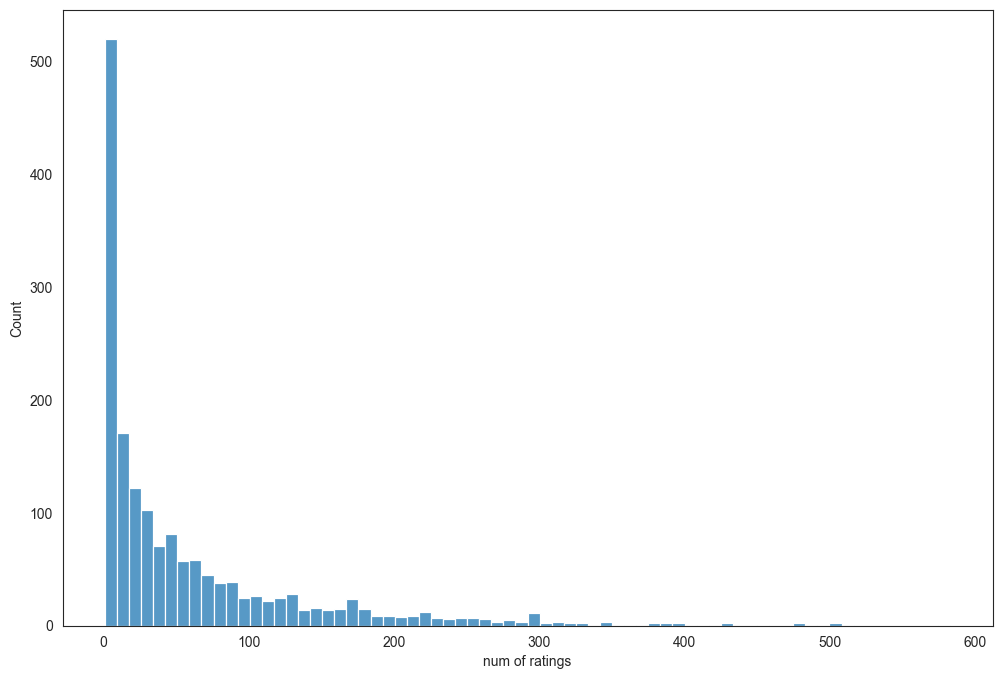

In [56]:
plt.figure(figsize=(12, 8))

sns.histplot(data=ratings, x='num of ratings', bins= 70)

plt.show()

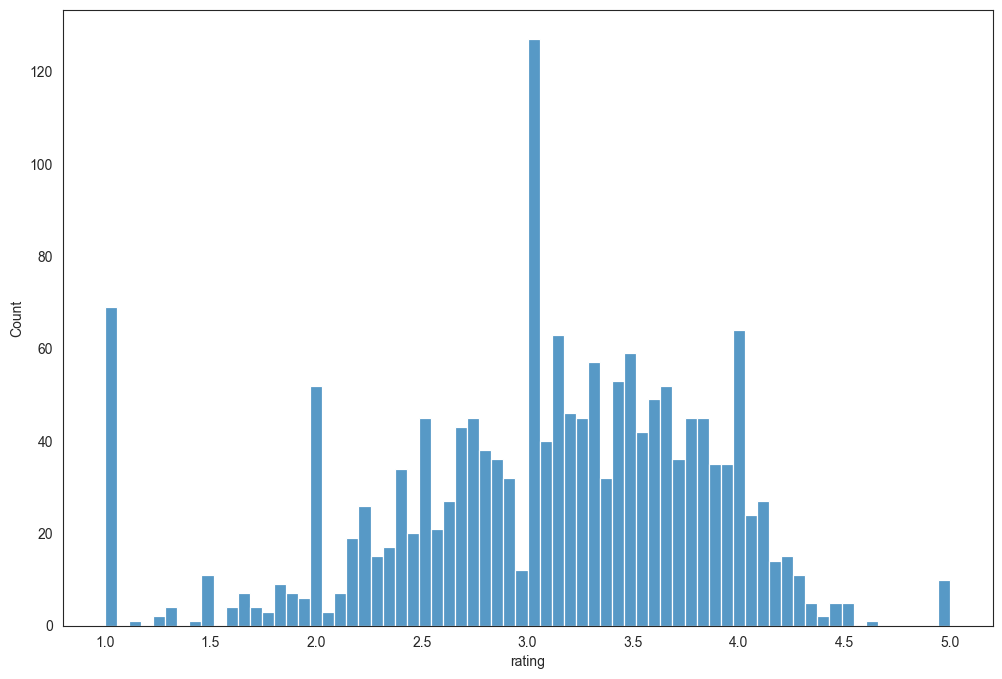

In [57]:
plt.figure(figsize=(12, 8))

sns.histplot(data=ratings, x='rating', bins= 70)

plt.show()

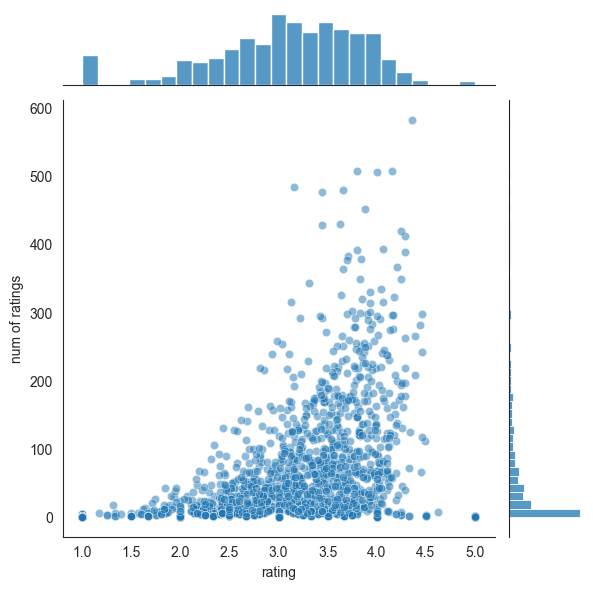

In [62]:
sns.jointplot(data=ratings, x='rating', y='num of ratings', alpha= 0.5)

In [69]:
ratings.sort_values(['num of ratings', 'rating'], ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Very Natural Thing, A (1974)",1.000000,1
"Vie est belle, La (Life is Rosey) (1987)",1.000000,1
Wend Kuuni (God's Gift) (1982),1.000000,1
